In [22]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

In [28]:
dim = 3
nump = 1000
nums = 1024
dt = 0.05
zeta = 1.0
m = 1.0
kBT = 1.0
std = np.sqrt(2*kBT*zeta*dt)
np.random.seed(0)
R = np.zeros([nump,dim]) # array to store current position
V = np.zeros([nump,dim]) # array to store current velocity
W = np.zeros([nump,dim]) # array to store current random forces
Rs = np.zeros([nums,nump,dim]) # array to store positions
Vs = np.zeros([nums,nump,dim]) # array to store velocities
Ws = np.zeros([nums,nump,dim]) # array to store random  force
F0 = 1.0
F = np.zeros([nump,dim])
F[:,0]=F0
time = np.zeros([nums]) # array to store all time steps
for i in range(nums):
    W = std*np.random.randn(nump,dim)
    R, V = R + V*dt, (V*(1-zeta/m*dt))+(W/m) + F/m*dt
    Rs[i]=R
    Vs[i]=V
    Ws[i]=W
    time[i] =i*dt

D =  1.0 (Theoretical)
D =  0.9250300115483934 (Simulation via MSD)


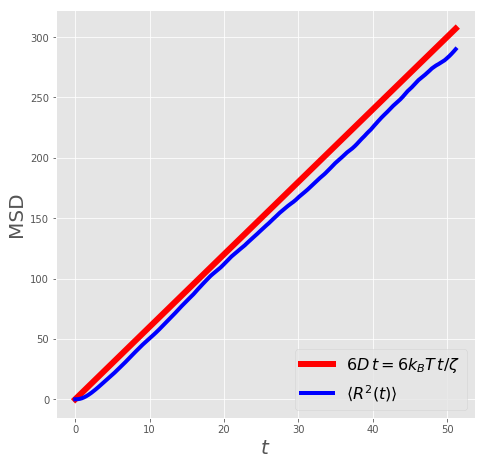

In [24]:
msd = np.zeros([nums])
for i in range(nums):
    for n in range(nump):
        msd[i] = msd[i] + np.linalg.norm(Rs[i,n,:])**2 # (R(t)-R(0))^2
    msd[i] = msd[i]/nump
dmsd = np.trapz(msd,dx=dt)/ (3*(nums*dt)**2)
print('D = ',kBT/zeta,'(Theoretical)')
print('D = ',dmsd,'(Simulation via MSD)')
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize = 20)
ax.set_ylabel(r"MSD", fontsize = 20)
ax.plot(time,6*kBT/zeta*time,'r',lw=6,label=r'$6D\,t={6k_BT \,t}/\zeta$')
ax.plot(time,msd,'b',lw = 4,label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=16,loc=4)
plt.show()

D =  1.0 (Theoretical)
D =  0.9447772846336528 (Simulation via Green-Kubo)


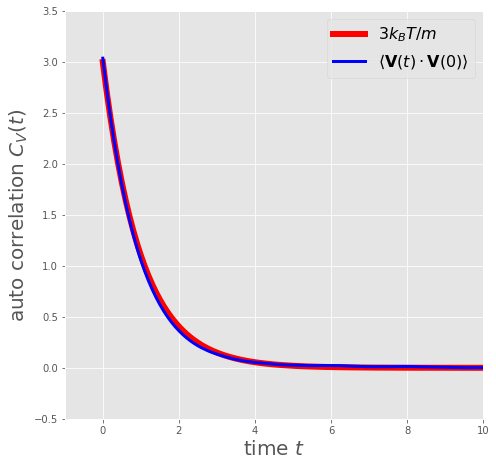

In [26]:
def auto_correlate(v):
    corr = np.correlate(v,v,mode='full')
    return corr[len(v)-1:]/len(v)
corr = np.zeros([nums])
for n in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,n,d])
corr=corr/nump
print('D = ',kBT/zeta,'(Theoretical)')
print('D = ',np.trapz(corr,dx=dt)/3,'(Simulation via Green-Kubo)')
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(time,dim*kBT/m*np.exp(-zeta/m*time),'r',lw=6,label=r'$3k_BT/m$')
ax.plot(time,corr,'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.set_xlabel(r"time $t$",fontsize=20)
ax.set_ylabel(r"auto correlation $C_V(t)$", fontsize=20)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)
plt.show()

D =  1.0 (Theoretical)
D =  0.980302218583486 (Simulation with external force)


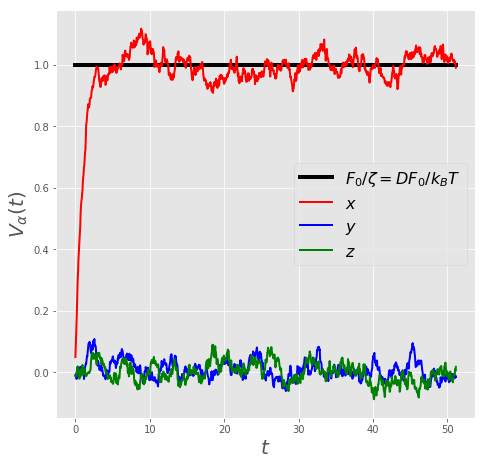

In [31]:
Vsa = np.average(Vs,axis=1)
Vx = np.average(Vsa[:,0])
print('D = ',kBT/zeta,'(Theoretical)')
print('D = ',Vx*kBT/F0,'(Simulation with external force)')
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_ylabel(r"$V_{\alpha}(t)$",fontsize=20)
ax.set_xlabel(r"$t$",fontsize=20)
ax.plot(time,F0/zeta*np.ones(nums),'k',lw=4,label=r"$F_0/\zeta=DF_0/k_BT$")
ax.plot(time,Vsa[:,0],'r',lw=2,label="$x$")
ax.plot(time,Vsa[:,1],'b',lw=2,label="$y$")
ax.plot(time,Vsa[:,2],'g',lw=2,label="$z$")
ax.legend(fontsize=16,loc=5)
plt.show()